In [1]:
from bunkatech.nested_topic_modeling import nested_topic_modeling
from bunkatech.networks.centroids import find_centroids
import pandas as pd
import bamboolib
import plotly
import pickle
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset="all", remove=("headers", "footers", "quotes"))["data"]
df = pd.DataFrame(docs)
df = df.sample(2000)
df = df.reset_index(drop=True)
df.columns = ["text"]
df["bindex"] = df.index

#### Fit the model

In [3]:
model = nested_topic_modeling()

bunka = model.fit(
    df,
    text_var="text",
    index_var="bindex",
    sample_size=2000,
    sample_terms=2000,
    embeddings_model="tfidf",
    ngrams=(1, 2),
    ents=False,
    language="en",
    db_path=".",
)

Embeddings..
Reducing the vectors..
UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_neighbors=10, verbose=True)
Wed Feb 23 14:48:31 2022 Construct fuzzy simplicial set
Wed Feb 23 14:48:31 2022 Finding Nearest Neighbors
Wed Feb 23 14:48:31 2022 Finished Nearest Neighbor Search
Wed Feb 23 14:48:31 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Feb 23 14:48:35 2022 Finished embedding
Extract Terms...


100%|█████████████████████████████████████████████████████████████| 1967/1967 [01:20<00:00, 24.59it/s]


In [ ]:
#### Get the centroids elements

#### Access the Bunka Visualization

In [3]:
plotly.offline.plot(bunka.sankey, auto_open=True, filename="saved_graph/sankey.html")
plotly.offline.plot(bunka.treemap, auto_open=True, filename="saved_graph/treemap.html")
plotly.offline.plot(
    bunka.sunburst, auto_open=True, filename="saved_graph/sunburst.html"
)

'saved_graph/sunburst.html'

UMAP Reduction...


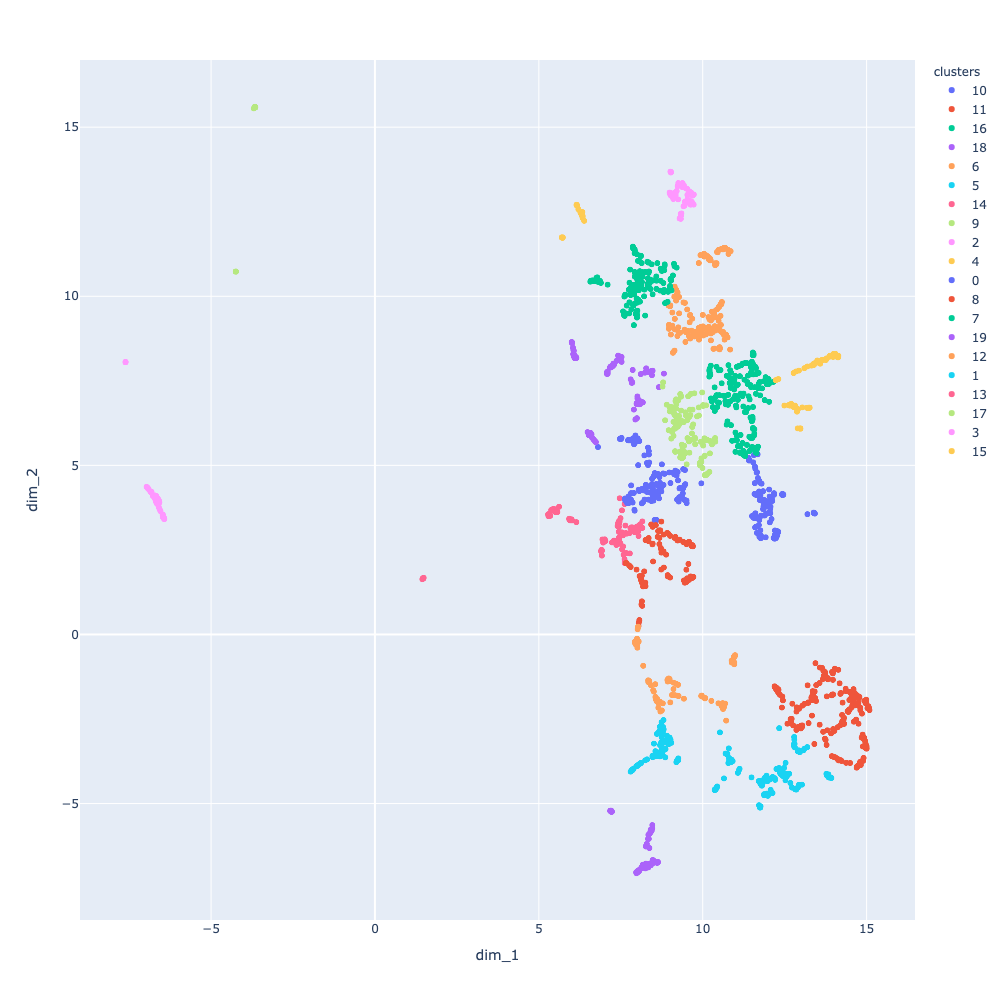

In [4]:
fig = model.visualize_embeddings(n_clusters = 20)
fig.show()

#### Get informations computed by the moded

In [6]:
terms = bunka.terms
df_cluster_names = bunka.h_clusters_names
df = bunka.df
df_embeddings = bunka.embeddings[[0,1,2,3,4]]
df_indexed = bunka.indexed_terms
df_cluster_number = bunka.h_clusters_number

In [ ]:
# rework on

In [39]:
nested_level = 2

df_centroid = df_embeddings.copy()
df_centroid['text'] = bunka.df['text']
df_centroid['bindex'] = bunka.df['bindex']
df_centroid = pd.merge(df_centroid, df_cluster_number, on = 'bindex')
df_centroid = df_centroid.rename(columns = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'})

res = find_centroids(df_centroid, text_var = 'text', cluster_var = 'level_2', top_elements=1, dim_lenght=5)
res

clusters                                   centroid_element  \
0          0  [After reading many postings concerning hard d...   
1          1  [Storage space for sale:\n    \n    Iomega 44 ...   
2          2  [I have a '81 DATSUN 210 HATCHBAK forsale:\n\n...   
3          3  [I am looking for a tandem bicycle, any make, ...   
4          4  [Help....\n\nI need to implement COM3 and COM4...   
..       ...                                                ...   
58        59  [I also use PhotoShop to edit photos, and do D...   
59        60  [****************************   SPHINX   *****...   
60        61  [Archive-name: Xt-FAQ\nVersion: $Id: FAQ-Xt,v ...   
61        62  [Hello,\nI have some problem in converting tga...   
62        63  [\nIt also runs OS/2 character based apps and ...   

                                         far_elements  distance  
0   -- \n*** Nothing beats skiing, if you want to ...  0.875210  
1   \nI copy relevant articles like this and post'...  0.739505  
2   It's my understanding that, when you format a ...  0.763454  
3   Hello\n\nas the subject tells all I am trying ...  1.005407  
4   Hello, I've been following discussions on 17" ...  0.962936  
..                                                ...       ...  
58  A few days ago, my powerbook starts to freeze ...  1.016468  
59  Due to a number of bugs in GKS4.1 under SUNOS ...  0.694295  
60  \n[some big deletions]\n      ^^^^^^^^^^^^^^^^...  0.923994  
61  \nHe is probably referring to the DOS version....  0.835703  
62  \n\n\n\n\n\nPlease research carefully.  Just b...  0.728599  

[63 rows x 4 columns]

In [45]:
res[res['clusters'] == 5]['centroid_element'].values

array([list(["i am sorry, but this genoa card does nothing that the ATI ultra plus 2mb\ncan't do, PLUS the ATI costs 330$US street price ....\n\n"])],
      dtype=object)

In [37]:
test = df_cluster_names[['level_2', "lemma_2"]].drop_duplicates()
test

level_2                     lemma_2
0           0          Drive | IDE | SCSI
50          1          MODEM | FAX | SALE
86          2  WINDOWS | Insurance | BOOK
111         3          SIMMS | I. | OFFER
155         4           Mice | DOS | LINE
...       ...                         ...
1771       59       GRAPHIC | Comp | NEWS
1797       60        Font | SUNOS | IMAGE
1823       61         WIDGETS | WAY | ADD
1852       62           FILE | EDU | Cica
1894       63        Software | Bit | FAX

[61 rows x 2 columns]

In [115]:
from sklearn.cluster import KMeans

In [116]:
df_embeddings["clusters"] = (
        KMeans(n_clusters=20).fit(bunka.embeddings[[0,1,2,3,4]]).labels_.astype(str)
    )

df_embeddings['text'] = bunka.df['text']
df_embeddings.to_csv('centroids_test.csv', index=False)

In [118]:
import bamboolib

In [15]:
res = pd.read_csv('centered_documents.csv', index_col = [0])

In [121]:
#def find_closest_documents(nested_level = 0)


